# ОИАД. Лабораторная работа №4

Горелик Мария, 11b гр., КТС, ПИ

## Подготовка данных

In [2]:
import pandas as pd
df = pd.read_csv('famcs_students.csv')

In [3]:
df.shape

(127, 25)

In [4]:
df.head()

,cource,group,stream,sex,age,ss,interest,os,weekend_study,bad_sleep,...,social,sport,miss,study_form,foot_size,eye_color,score,retake,hostel,literature
0,4,11,Прикладная информатика,М,20.0,Нет,Математика,MacOS,Да,Да,...,Экстраверт,"Редко, легкая физкультура",3.0,Бюджет,48.0,Карие,9.2,0,"Нет, я из Минска",Да
1,4,11,Прикладная информатика,Ж,20.0,Нет,Программирование,MacOS,Нет,Нет,...,Экстраверт,"Да, я спортсмен",5.0,Бюджет,39.0,Зеленые,8.8,0,"Нет, я из Минска",Да
2,4,11,Прикладная информатика,Ж,19.0,Нет,Программирование,MacOS,Да,Нет,...,Экстраверт,Вообще нет,10.0,Бюджет,41.0,Карие,8.8,0,"Нет, я из Минска",Да
3,4,11,Прикладная информатика,Ж,20.0,Нет,Математика,MacOS,Да,Да,...,Экстраверт,"Да, я спортсмен",3.0,Бюджет,36.0,Карие,8.8,0,"Нет, я из Минска",Да
4,4,11,Прикладная информатика,М,20.0,Нет,Математика,Windows,Да,Нет,...,Интроверт,Вообще нет,1.0,Бюджет,46.0,Зеленые,9.0,0,"Нет, я из Минска",Да


### Определение колонки для таргета

In [6]:
binary_cols = ['ss', 'interest', 'weekend_study', 'bad_sleep', 'glasses', 'anime', 'study_form', 'literature']
N = 3
target = binary_cols[N % 8]
target

'bad_sleep'

In [14]:
cols = df.columns.tolist()
cols

['cource',
 'group',
 'stream',
 'sex',
 'age',
 'ss',
 'interest',
 'os',
 'weekend_study',
 'bad_sleep',
 'glasses',
 'work_experience',
 'ai',
 'height',
 'anime',
 'social',
 'sport',
 'miss',
 'study_form',
 'foot_size',
 'eye_color',
 'score',
 'retake',
 'hostel',
 'literature']

In [10]:
df.describe()

,cource,group,age,height,miss,foot_size,score
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,3.952756,6.118110,20.433071,178.751969,7.850394,41.953741,7.555433
std,0.213001,4.460789,1.394949,13.360222,8.716276,3.389107,1.460913
min,3.000000,1.000000,16.000000,100.000000,0.000000,34.125120,0.000000
25%,4.000000,2.000000,20.000000,170.000000,3.000000,39.000000,7.000000
50%,4.000000,4.000000,20.000000,179.000000,5.000000,42.000000,7.600000
75%,4.000000,11.000000,21.000000,187.000000,10.000000,45.000000,8.450000
max,4.000000,13.000000,30.000000,220.000000,40.000000,50.000000,10.000000


In [11]:
cat_cols = ['group', 'stream', 'sex', 'ss', 'interest', 'os', 'weekend_study', 'glasses', 'work_experience', 
            'ai', 'anime', 'social', 'sport', 'study_form', 'eye_color', 'retake', 'hostel', 'literature']

In [24]:
num_cols = ['cource', 'age', 'height', 'miss', 'foot_size', 'score']

In [21]:
target = 'bad_sleep'

In [25]:
len(cols) == len(cat_cols) + len(num_cols) + 1

True

## Распредение числовых фичей и таргета

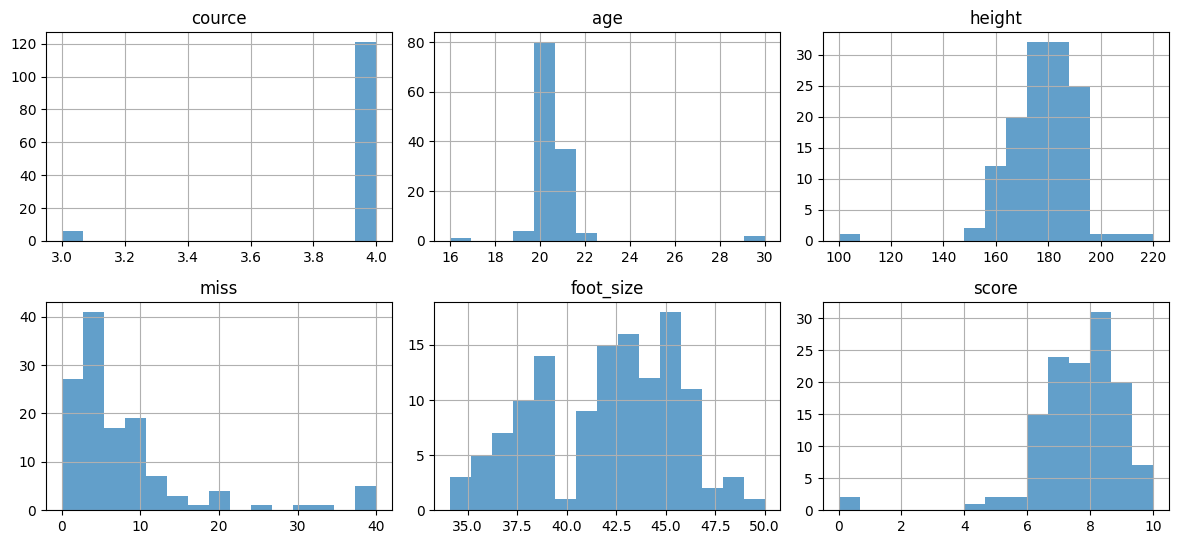

In [31]:
import matplotlib.pyplot as plt

df[num_cols].hist(
    bins=15,
    figsize=(12, 8),
    layout=(3, 3), 
    alpha=0.7
)
plt.tight_layout()
plt.show()

## Уникальные значения категориальных фичей и таргета

In [32]:
for col in cat_cols + [target]:
    unique_vals = df[col].unique()
    nunique_vals = df[col].nunique()
    print(f"{col}:")
    print(f"  Количество уникальных: {nunique_vals}")
    print(f"  Значения: {list(unique_vals)}")

group:
  Количество уникальных: 8
  Значения: [np.int64(11), np.int64(8), np.int64(13), np.int64(2), np.int64(3), np.int64(4), np.int64(12), np.int64(1)]
stream:
  Количество уникальных: 3
  Значения: ['Прикладная информатика', 'Прикладная математика', 'Информатика']
sex:
  Количество уникальных: 2
  Значения: ['М', 'Ж']
ss:
  Количество уникальных: 2
  Значения: ['Нет', 'Да']
interest:
  Количество уникальных: 2
  Значения: ['Математика', 'Программирование']
os:
  Количество уникальных: 3
  Значения: ['MacOS', 'Windows', 'Linux']
weekend_study:
  Количество уникальных: 2
  Значения: ['Да', 'Нет']
glasses:
  Количество уникальных: 2
  Значения: ['Нет', 'Да']
work_experience:
  Количество уникальных: 4
  Значения: ['Меньше года', '1-2 года', 'Не работаю', 'более 2 лет']
ai:
  Количество уникальных: 13
  Значения: ['Cursor', 'Mistral', 'ChatGPT', 'Qwen', 'DeepSeek', 'claude', 'Gemini', 'Copilot', 'дядя Степа aka Каланча', 'Gemini от Google', 'Grok', 'Claude', 'gpt oss 120b']
anime:
  Кол

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

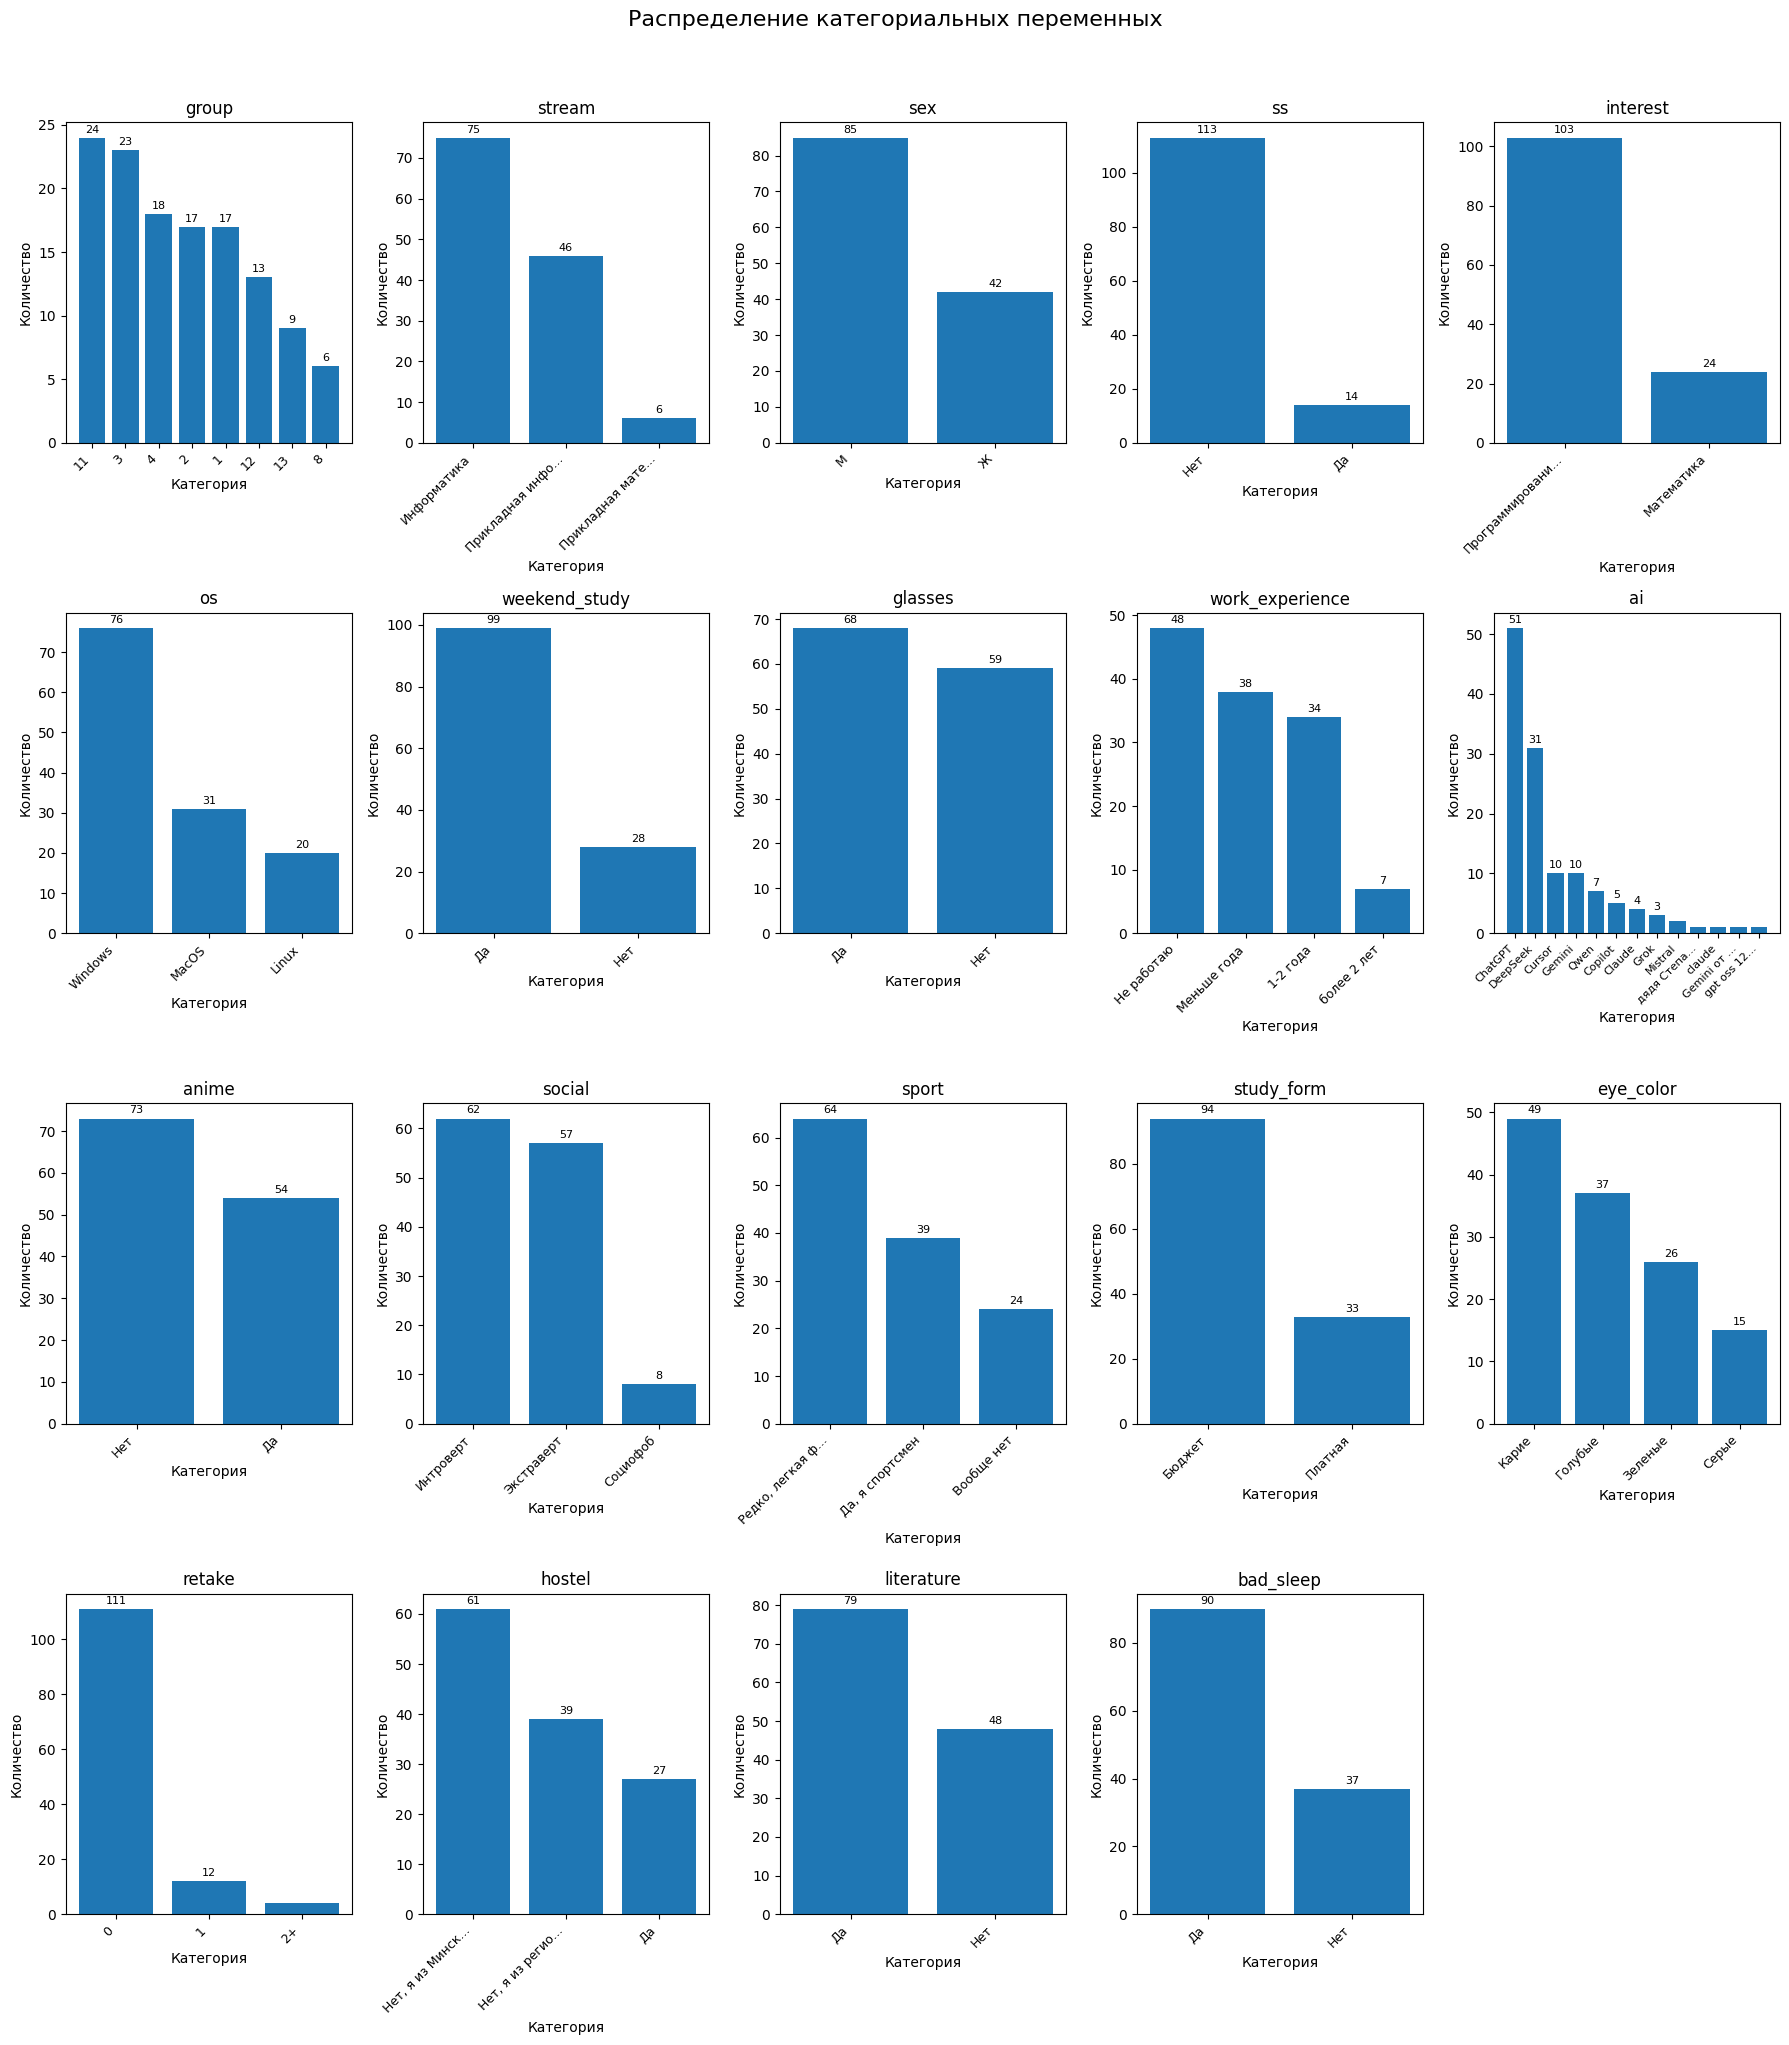

In [38]:
cols_to_plot = cat_cols + [target]
n_cols_total = len(cols_to_plot)
n_cols = 5  
n_rows = (n_cols_total + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
if n_rows > 1:
    axes = axes.flatten()
else:
    axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]
for idx, col in enumerate(cols_to_plot):
    ax = axes[idx]
    value_counts = df[col].value_counts()
    max_categories = 15 
    if len(value_counts) > max_categories:
        value_counts = value_counts.head(max_categories)
        ax.set_title(f'Распределение: {col}\n(Топ-{max_categories} категорий)', fontsize=12)
    else:
        ax.set_title(f'{col}', fontsize=12)
    bars = ax.bar(range(len(value_counts)), value_counts.values)
    ax.set_xlabel('Категория')
    ax.set_ylabel('Количество')
    if len(value_counts) <= 10:  
        ax.set_xticks(range(len(value_counts)))
        labels = [str(label)[:15] + '...' if len(str(label)) > 15 else str(label) 
                  for label in value_counts.index]
        ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
    else:  
        step = max(1, len(value_counts) // 10)
        ax.set_xticks(range(0, len(value_counts), step))
        labels = [str(value_counts.index[i])[:10] + '...' if len(str(value_counts.index[i])) > 10 
                  else str(value_counts.index[i]) for i in range(0, len(value_counts), step)]
        ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
    for bar in bars:
        height = bar.get_height()
        if height > max(value_counts.values) * 0.05:  
            ax.text(bar.get_x() + bar.get_width()/2., height + max(value_counts.values)*0.01,
                    f'{int(height)}', ha='center', va='bottom', fontsize=8)
for idx in range(len(cols_to_plot), len(axes)):
    axes[idx].set_visible(False)
plt.suptitle('Распределение категориальных переменных', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

### Оставляем признаки, отобранные по 'экспертному мнению'

In [39]:
num_cols = ['cource', 'age', 'miss', 'score']

In [40]:
cat_cols = ['stream', 'sex', 'ss', 'weekend_study', 'work_experience', 
                'anime', 'social', 'sport', 'study_form', 'retake', 'hostel', 'literature']

In [41]:
target = 'bad_sleep'

In [42]:
df_final = df[num_cols + cat_cols + [target]]

In [43]:
import os
import sys
import math
import copy
import numpy as np
import pandas as pd
from collections import Counter
from typing import Optional, List, Tuple
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

## One-hot

In [93]:
X = df_final.drop(columns=[target])
y = df_final[target].map({"Да": 1, "Нет": 0})

In [94]:
X_encoded = pd.get_dummies(X, columns=cat_cols, dtype=int, drop_first=True)
X_encoded.head()

,cource,age,miss,score,stream_Прикладная информатика,stream_Прикладная математика,sex_М,ss_Нет,weekend_study_Нет,work_experience_Меньше года,...,social_Социофоб,social_Экстраверт,"sport_Да, я спортсмен","sport_Редко, легкая физкультура",study_form_Платная,retake_1,retake_2+,"hostel_Нет, я из Минска","hostel_Нет, я из регионов",literature_Нет
0,4,20.0,3.0,9.2,1,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,0
1,4,20.0,5.0,8.8,1,0,0,1,1,0,...,0,1,1,0,0,0,0,1,0,0
2,4,19.0,10.0,8.8,1,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
3,4,20.0,3.0,8.8,1,0,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
4,4,20.0,1.0,9.0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [95]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: bad_sleep, dtype: int64

In [96]:
X = X_encoded

## Разделение на train, validation и test

In [97]:
test_size = 0.15
val_size = 0.15

In [98]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
val_ratio_within = val_size / (1 - test_size)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=val_ratio_within, random_state=42, stratify=y_train_val)

In [99]:
X_train.shape, X_val.shape, X_test.shape

((88, 23), (19, 23), (20, 23))

### Общий базовый класс для реализуемых моделей

In [53]:
class BaseClassifier:
    def fit(self, X: pd.DataFrame, y: pd.Series):
        raise NotImplementedError
    
    def predict_proba(self, X: pd.DataFrame) -> np.ndarray:
        raise NotImplementedError
    
    def predict(self, X: pd.DataFrame, threshold: float=0.5) -> np.ndarray:
        probs = self.predict_proba(X)
        return (probs >= threshold).astype(int)

### Класс для оценки метрик

In [54]:
class ModelEvaluator:
    @staticmethod
    def accuracy(y_true: np.ndarray, y_pred: np.ndarray) -> float:
        return float((y_true == y_pred).mean())
    
    @staticmethod
    def precision(y_true: np.ndarray, y_pred: np.ndarray) -> float:
        tp = float(((y_true == 1) & (y_pred == 1)).sum())
        fp = float(((y_true == 0) & (y_pred == 1)).sum())
        return tp / (tp + fp) if (tp + fp) > 0 else 0.0
    
    @staticmethod
    def recall(y_true: np.ndarray, y_pred: np.ndarray) -> float:
        tp = float(((y_true == 1) & (y_pred == 1)).sum())
        fn = float(((y_true == 1) & (y_pred == 0)).sum())
        return tp / (tp + fn) if (tp + fn) > 0 else 0.0
    
    @staticmethod
    def f1(y_true: np.ndarray, y_pred: np.ndarray) -> float:
        p = ModelEvaluator.precision(y_true,y_pred)
        r = ModelEvaluator.recall(y_true,y_pred)
        return 2*p*r/(p+r) if (p+r) > 0 else 0.0
    
    @staticmethod
    def roc_auc(y_true: np.ndarray, y_score: np.ndarray) -> float:
        try:
            return float(roc_auc_score(y_true, y_score))
        except Exception:
            return float('nan')
        
    @staticmethod
    def confusion(y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:
        return confusion_matrix(y_true, y_pred)

## 0. Тривиальный классификатор

In [55]:
class TrivialClassifier(BaseClassifier):
    def __init__(self):
        self.most_common = None

    def fit(self, X: pd.DataFrame, y: pd.Series):
        self.most_common = int(pd.Series(y).mode().iloc[0])
        
    def predict_proba(self, X: pd.DataFrame) -> np.ndarray:
        if self.most_common is None:
            raise ValueError("Model not fitted")
        p = np.full((len(X),), float(self.most_common))
        return p if self.most_common==1 else 1-p

## 1. Наивный байесовский классификатор

In [56]:
class NaiveBayesGaussian(BaseClassifier):
    def __init__(self):
        self.priors = {}
        self.means = {}
        self.vars = {}
        self.features = None

    def fit(self, X: pd.DataFrame, y: pd.Series):
        X = X.copy().reset_index(drop=True)
        y = y.reset_index(drop=True)
        self.features = X.columns.tolist()
        classes = sorted(y.unique())
        for c in classes:
            Xc = X[y==c]
            self.priors[c] = len(Xc) / len(X)
            self.means[c] = Xc.mean().to_numpy(dtype=float)
            self.vars[c] = (Xc.var(ddof=0).to_numpy(dtype=float) + 1e-6)

    def _gauss_logpdf(self, x: np.ndarray, mean: np.ndarray, var: np.ndarray) -> np.ndarray:
        coeff = -0.5 * np.log(2 * np.pi * var)
        exponent = -0.5 * ((x - mean)**2) / var
        return (coeff + exponent).sum(axis=1)
    
    def predict_proba(self, X: pd.DataFrame) -> np.ndarray:
        if self.features is None:
            raise ValueError("Model not fitted")
        x = X[self.features].to_numpy(dtype=float)
        log_post = {}
        for c in self.priors:
            log_prior = math.log(self.priors[c])
            log_lik = self._gauss_logpdf(x, self.means[c], self.vars[c])
            log_post[c] = log_prior + log_lik
        log0 = log_post.get(0, np.full_like(next(iter(log_post.values())), -np.inf))
        log1 = log_post.get(1, np.full_like(next(iter(log_post.values())), -np.inf))
        maxlog = np.maximum(log0, log1)
        denom = maxlog + np.log(np.exp(log0 - maxlog) + np.exp(log1 - maxlog))
        prob1 = np.exp(log1 - denom)
        return prob1

## 2. Метод k-ближайших соседей

In [58]:
class KNNClassifier(BaseClassifier):
    def __init__(self, k: int=3):
        self.k = k
        self.X_train = None
        self.y_train = None
        self.features = None

    def fit(self, X: pd.DataFrame, y: pd.Series):
        self.features = X.columns.tolist()
        self.X_train = X[self.features].to_numpy(dtype=float)
        self.y_train = y.to_numpy(dtype=int)
        
    def _pairwise_distances(self, A: np.ndarray, B: np.ndarray) -> np.ndarray:
        # Euclidean distances: (a-b)^2 = a^2 + b^2 -2ab
        aa = (A**2).sum(axis=1).reshape(-1,1)
        bb = (B**2).sum(axis=1).reshape(1,-1)
        ab = A.dot(B.T)
        d2 = aa + bb - 2*ab
        d2[d2 < 0] = 0.0
        return np.sqrt(d2)
    
    def predict_proba(self, X: pd.DataFrame) -> np.ndarray:
        if self.X_train is None:
            raise ValueError("Model not fitted")
        A = X[self.features].to_numpy(dtype=float)
        d = self._pairwise_distances(A, self.X_train)  
        k = min(self.k, self.X_train.shape[0])
        idx = np.argpartition(d, kth=k-1, axis=1)[:, :k]
        probs = np.array([(self.y_train[i].sum())/k for i in idx])
        return probs

## 3. Логистическая регрессия

In [59]:
class LogisticRegressionGD(BaseClassifier):
    def __init__(self, lr: float=0.1, n_epochs: int=1000, l2: float=0.0, verbose: bool=False):
        self.lr = lr
        self.n_epochs = n_epochs
        self.l2 = l2
        self.verbose = verbose
        self.coef_ = None
        self.intercept_ = 0.0
        self.features = None

    def _sigmoid(self, z: np.ndarray) -> np.ndarray:
        return 1.0 / (1.0 + np.exp(-z))
    
    def fit(self, X: pd.DataFrame, y: pd.Series):
        self.features = X.columns.tolist()
        Xmat = X[self.features].to_numpy(dtype=float)
        n_samples, n_features = Xmat.shape
        self.coef_ = np.zeros(n_features, dtype=float)
        self.intercept_ = 0.0
        yvec = y.to_numpy(dtype=float)
        for epoch in range(self.n_epochs):
            z = Xmat.dot(self.coef_) + self.intercept_
            preds = self._sigmoid(z)
            error = preds - yvec
            grad_w = (Xmat.T.dot(error)) / n_samples + self.l2 * self.coef_
            grad_b = error.mean()
            self.coef_ -= self.lr * grad_w
            self.intercept_ -= self.lr * grad_b
            if self.verbose and (epoch % 200 == 0):
                loss = - (yvec * np.log(preds+1e-12) + (1-yvec)*np.log(1-preds+1e-12)).mean()
                print(f"Epoch {epoch}: loss={loss:.4f}")
                
    def predict_proba(self, X: pd.DataFrame) -> np.ndarray:
        if self.coef_ is None:
            raise ValueError("Model not fitted")
        Xmat = X[self.features].to_numpy(dtype=float)
        z = Xmat.dot(self.coef_) + self.intercept_
        return self._sigmoid(z)

## Нормировка

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
class SimplePreprocessor:
    def __init__(self):
        self.num_cols = []
        self.other_cols = []
        self.scaler = None
        self.feature_names_ = None

    def fit(self, X, num_cols):
        # numeric columns
        self.num_cols = num_cols

        # all other columns pass through unchanged
        self.other_cols = [c for c in X.columns if c not in num_cols]

        # fit scaler only on numeric cols
        if self.num_cols:
            self.scaler = StandardScaler()
            self.scaler.fit(X[self.num_cols])

        # feature order
        self.feature_names_ = self.num_cols + self.other_cols

    def transform(self, X):
        parts = []

        # numeric scaled
        if self.num_cols:
            parts.append(
                pd.DataFrame(
                    self.scaler.transform(X[self.num_cols]),
                    columns=self.num_cols,
                    index=X.index
                )
            )

        # other cols untouched
        if self.other_cols:
            parts.append(
                pd.DataFrame(
                    X[self.other_cols].values,
                    columns=self.other_cols,
                    index=X.index
                )
            )

        return pd.concat(parts, axis=1)[self.feature_names_]


## Сравнение моделей

In [100]:
def run_experiment(X_train, y_train, X_val, y_val, X_test, y_test):
    pre = SimplePreprocessor()
    pre.fit(X_train, num_cols)
    X_train_p = pre.transform(X_train)
    X_val_p = pre.transform(X_val)
    X_test_p = pre.transform(X_test)

    X_train_p = X_train_p.reset_index(drop=True)
    X_val_p = X_val_p.reset_index(drop=True)
    X_test_p = X_test_p.reset_index(drop=True)

    # Trivial
    trivial = TrivialClassifier()
    trivial.fit(X_train_p, y_train)
    y_test_pred_tri = trivial.predict(X_test_p)
    y_test_prob_tri = trivial.predict_proba(X_test_p)

    # Naive Bayes 
    nb = NaiveBayesGaussian()
    nb.fit(X_train_p, y_train)
    y_val_prob_nb = nb.predict_proba(X_val_p)
    y_test_prob_nb = nb.predict_proba(X_test_p)
    y_test_pred_nb = (y_test_prob_nb >= 0.5).astype(int)

    # kNN: tuning k on validation
    # try odd k from 1 to min(25, sqrt(n_train)*2)
    n_train = X_train_p.shape[0]
    max_k = min(25, max(1, int(math.sqrt(n_train))*2+1))
    candidate_ks = [k for k in range(1, max_k+1) if k%2==1]
    best_k = candidate_ks[0]
    best_f1 = -1
    for k in candidate_ks:
        knn = KNNClassifier(k=k)
        knn.fit(X_train_p, y_train)
        y_val_prob = knn.predict_proba(X_val_p)
        y_val_pred = (y_val_prob >= 0.5).astype(int)
        f1 = ModelEvaluator.f1(y_val.to_numpy(), y_val_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_k = k
    print(f"kNN: best k on validation = {best_k} (F1={best_f1:.4f})")
    knn_best = KNNClassifier(k=best_k)
    knn_best.fit(X_train_p, y_train)
    y_test_prob_knn = knn_best.predict_proba(X_test_p)
    y_test_pred_knn = (y_test_prob_knn >= 0.5).astype(int)

    # Logistic Regression: training and tuning threshold on validation
    logreg = LogisticRegressionGD(lr=0.1, n_epochs=2000, l2=0.0, verbose=False)
    logreg.fit(pd.concat([X_train_p, X_val_p], axis=0).reset_index(drop=True), pd.concat([y_train, y_val], axis=0).reset_index(drop=True))
    y_val_prob_log = logreg.predict_proba(X_val_p)
    thresholds = np.linspace(0.01, 0.99, 99)
    precisions = []
    recalls = []
    f1s = []
    for t in thresholds:
        yp = (y_val_prob_log >= t).astype(int)
        precisions.append(ModelEvaluator.precision(y_val.to_numpy(), yp))
        recalls.append(ModelEvaluator.recall(y_val.to_numpy(), yp))
        f1s.append(ModelEvaluator.f1(y_val.to_numpy(), yp))
    best_idx = int(np.nanargmax(f1s))
    best_thresh = thresholds[best_idx]
    print(f"Logistic: best threshold on validation (max F1) = {best_thresh:.3f} (F1={f1s[best_idx]:.4f})")
    
    plt.figure(figsize=(8,5))
    plt.plot(thresholds, precisions, label='precision')
    plt.plot(thresholds, recalls, label='recall')
    plt.axvline(best_thresh, color='k', linestyle='--', label=f'best_thresh={best_thresh:.2f}')
    plt.xlabel('threshold')
    plt.ylabel('score')
    plt.title('Precision and Recall vs Threshold (validation)')
    plt.legend()
    plot_path = 'precision_recall_vs_threshold.png'
    plt.savefig(plot_path, bbox_inches='tight')
    print(f"Saved precision/recall plot to {plot_path}")

    y_test_prob_log = logreg.predict_proba(X_test_p)
    y_test_pred_log = (y_test_prob_log >= best_thresh).astype(int)

    # Results
    results = {}
    models_info = {
        'Trivial': (trivial, y_test_prob_tri, y_test_pred_tri),
        'NaiveBayes': (nb, y_test_prob_nb, y_test_pred_nb),
        f'kNN(k={best_k})': (knn_best, y_test_prob_knn, y_test_pred_knn),
        'Logistic': (logreg, y_test_prob_log, y_test_pred_log)
    }
    for name, (model, y_prob, y_pred) in models_info.items():
        y_true = y_test.to_numpy()
        acc = ModelEvaluator.accuracy(y_true, y_pred)
        prec = ModelEvaluator.precision(y_true, y_pred)
        rec = ModelEvaluator.recall(y_true, y_pred)
        roc = ModelEvaluator.roc_auc(y_true, y_prob)
        cm = ModelEvaluator.confusion(y_true, y_pred)
        results[name] = {
            'accuracy': acc,
            'precision': prec,
            'recall': rec,
            'roc_auc': roc,
            'confusion_matrix': cm
        }
    
    for name, mets in results.items():
        print('\n' + '='*40)
        print(f"Model: {name}")
        print(f"Accuracy: {mets['accuracy']:.4f}")
        print(f"Precision: {mets['precision']:.4f}")
        print(f"Recall: {mets['recall']:.4f}")
        print(f"ROC-AUC: {mets['roc_auc']:.4f}")
        print(f"Confusion matrix:\n{mets['confusion_matrix']}")

kNN: best k on validation = 3 (F1=0.8571)
Logistic: best threshold on validation (max F1) = 0.600 (F1=0.9231)
Saved precision/recall plot to precision_recall_vs_threshold.png

Model: Trivial
Accuracy: 0.7000
Precision: 0.7000
Recall: 1.0000
ROC-AUC: 0.5000
Confusion matrix:
[[ 0  6]
 [ 0 14]]

Model: NaiveBayes
Accuracy: 0.5000
Precision: 0.8333
Recall: 0.3571
ROC-AUC: 0.5774
Confusion matrix:
[[5 1]
 [9 5]]

Model: kNN(k=3)
Accuracy: 0.6000
Precision: 0.6875
Recall: 0.7857
ROC-AUC: 0.4583
Confusion matrix:
[[ 1  5]
 [ 3 11]]

Model: Logistic
Accuracy: 0.6500
Precision: 0.7059
Recall: 0.8571
ROC-AUC: 0.4643
Confusion matrix:
[[ 1  5]
 [ 2 12]]


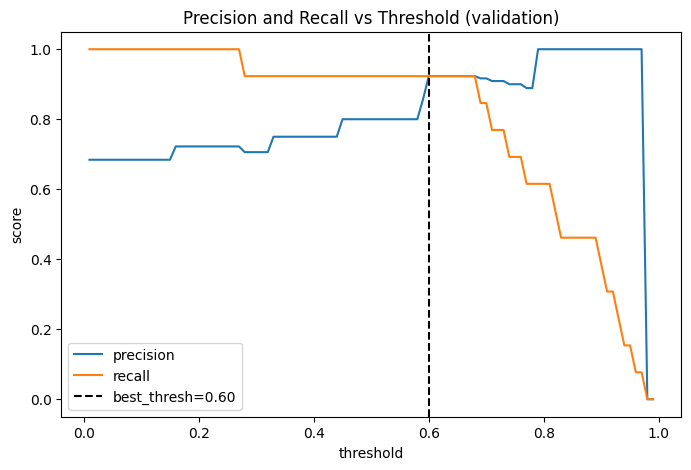

In [101]:
run_experiment(X_train, y_train, X_val, y_val, X_test, y_test)